In [1]:
import pandas
import numpy as np
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)
  
#read from google drive
data=pandas.read_csv("https://drive.google.com/uc?export=download&id=10cwdWd4axXdQX-53FBecxRo1bcXcQVP4")
  
print(data.head())

   employee_id  company_id              dept  seniority    salary   join_date   quit_date
0      13021.0           7  customer_service         28   89000.0  2014-03-24  2015-10-30
1     825355.0           7         marketing         20  183000.0  2013-04-29  2014-04-04
2     927315.0           4         marketing         14  101000.0  2014-10-13         NaN
3     662910.0           7  customer_service         20  115000.0  2012-05-14  2013-06-07
4     256971.0           2      data_science         23  276000.0  2011-10-17  2014-08-22


In [2]:
from datetime import datetime
  
#make them a date
data['join_date'] = pandas.to_datetime(data['join_date']) 
data['quit_date'] = pandas.to_datetime(data['quit_date']) 
  
#everything seems to make sense, some simple plots would help double check that
data.describe(include="all")

<ipython-input-2-4b03c3c48d69>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all")
<ipython-input-2-4b03c3c48d69>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all")


,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,24702.000000,24702.000000,24702,24702.000000,24702.000000,24702,13510
unique,NaN,NaN,6,NaN,NaN,995,664
top,NaN,NaN,customer_service,NaN,NaN,2012-01-03 00:00:00,2015-05-08 00:00:00
freq,NaN,NaN,9180,NaN,NaN,105,111
first,NaN,NaN,NaN,NaN,NaN,2011-01-24 00:00:00,2011-10-13 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2015-12-10 00:00:00,2015-12-09 00:00:00
mean,501604.403530,3.426969,NaN,14.127803,138183.345478,NaN,NaN
std,288909.026101,2.700011,NaN,8.089520,76058.184573,NaN,NaN
min,36.000000,1.000000,NaN,1.000000,17000.000000,NaN,NaN
25%,250133.750000,1.000000,NaN,7.000000,79000.000000,NaN,NaN


In [3]:
#create list of unique dates for the tables
unique_dates = pandas.date_range(start='2011/01/24', end='2015/12/13')
  
#create list of unique companies
unique_companies = data['company_id'].unique()
  
#cross join so I get all combinations of dates and companies. Will need it later.
data_headcount = pandas.MultiIndex.from_product([unique_dates, unique_companies], names = ["date", "company_id"])

In [5]:
data_headcount

MultiIndex([('2011-01-24',  7),
            ('2011-01-24',  4),
            ('2011-01-24',  2),
            ('2011-01-24',  9),
            ('2011-01-24',  1),
            ('2011-01-24',  6),
            ('2011-01-24', 10),
            ('2011-01-24',  5),
            ('2011-01-24',  3),
            ('2011-01-24',  8),
            ...
            ('2015-12-13',  2),
            ('2015-12-13',  9),
            ('2015-12-13',  1),
            ('2015-12-13',  6),
            ('2015-12-13', 10),
            ('2015-12-13',  5),
            ('2015-12-13',  3),
            ('2015-12-13',  8),
            ('2015-12-13', 11),
            ('2015-12-13', 12)],
           names=['date', 'company_id'], length=21420)

In [6]:
data_headcount = pandas.DataFrame(index = data_headcount).reset_index()

In [7]:
data_headcount 

,date,company_id
0,2011-01-24,7
1,2011-01-24,4
2,2011-01-24,2
3,2011-01-24,9
4,2011-01-24,1
...,...,...
21415,2015-12-13,5
21416,2015-12-13,3
21417,2015-12-13,8
21418,2015-12-13,11


In [11]:
data.groupby(['join_date', 'company_id']).size().reset_index(name='join_count')

,join_date,company_id,join_count
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5
...,...,...,...
5125,2015-12-09,1,1
5126,2015-12-09,2,2
5127,2015-12-09,3,1
5128,2015-12-10,1,1


In [12]:
#now I get for each day/company, how many people quit/got hired on that day
data_join = data.groupby(['join_date', 'company_id']).size().reset_index(name='join_count')
data_join.columns.values[0]='date'

In [13]:
data_quit = data.groupby(['quit_date', 'company_id']).size().reset_index(name='quit_count')
data_quit.columns.values[0]='date'

In [14]:
#Now I left outer join with data_headcount. 
#NA means no people were hired/quit on that day cause there is no match.
data_headcount = pandas.merge(data_headcount, data_join, on=["date", "company_id"], how='left')
data_headcount = pandas.merge(data_headcount, data_quit, on=["date", "company_id"], how='left')
  
#replace the NAs with 0
data_headcount.fillna(0, inplace=True)
  
#Now I need the sum by company_id. Data set is already ordered by date, so I can simply group by company_id and do cumsum
data_headcount['cumsum_join'] = data_headcount.groupby(['company_id'])['join_count'].apply(lambda x: x.cumsum())
data_headcount['cumsum_quit'] = data_headcount.groupby(['company_id'])['quit_count'].apply(lambda x: x.cumsum())
  
#finally, for each date I just take join_count - quit_count and I am done
data_headcount['count'] = data_headcount['cumsum_join'] - data_headcount['cumsum_quit']
data_headcount_table = data_headcount[["date", "company_id","count"]]
  
#let's check company 1
print(data_headcount_table.query("company_id == 1").head(15))

          date  company_id  count
4   2011-01-24           1   25.0
16  2011-01-25           1   27.0
28  2011-01-26           1   29.0
40  2011-01-27           1   29.0
52  2011-01-28           1   29.0
64  2011-01-29           1   29.0
76  2011-01-30           1   29.0
88  2011-01-31           1   59.0
100 2011-02-01           1   66.0
112 2011-02-02           1   67.0
124 2011-02-03           1   67.0
136 2011-02-04           1   67.0
148 2011-02-05           1   67.0
160 2011-02-06           1   67.0
172 2011-02-07           1   99.0


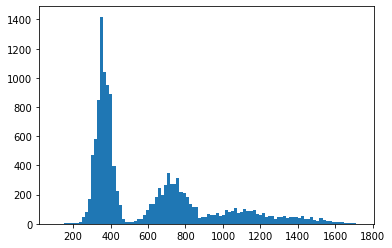

In [15]:
import matplotlib.pyplot as plt
  
#How many days were they employed? This should matter. People might get bored in the same place for too long
data['employment_length'] = (data['quit_date'] - data['join_date']).astype('timedelta64[D]')
  
#Let's plot employment length in days
plt.hist(data['employment_length'].dropna(), bins=100)
plt.show()

In [16]:
from datetime import timedelta
#Create binary class
data=data[data['join_date'] <datetime.strptime("2015/12/13", "%Y/%m/%d") - timedelta(days=(365+31))]
data['early_quitter'] = np.where((data['employment_length']>396) | (np.isnan(data['employment_length'])), 0, 1)

In [23]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
  
data_dummy = pandas.get_dummies(data[['company_id', 'dept', 'seniority', 'salary', 'early_quitter']], drop_first=True)           
  
#we are not too interested in predictive power, we are mainly using the tree as a descriptive stat tool
tree = DecisionTreeClassifier( max_depth=4, class_weight="balanced", min_impurity_decrease = 0.001)
tree.fit(data_dummy.drop('early_quitter', axis=1), data['early_quitter'])
  
#visualize it
export_graphviz(tree, out_file="tree_employee.dot", feature_names=data_dummy.drop('early_quitter', axis=1).columns, proportion=True, rotate=True)
with open("tree_employee.dot") as f:
    dot_graph = f.read()
s = Source.from_file("tree_employee.dot")
s.view()

'tree_employee.dot.pdf'